## Introduction

This case study is part of Google's Data Analyst Certificate at Coursera, completed on September 2022.

On this case study, we'll go over each step of the data analysis process: **ask, prepare, process, analyze, share,** and **act**. I chose to work with R and Kaggle for data manipulation and presentation, and Tableau for the visualizations.

### Summary

#### Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing, Lily Moreno, believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

#### About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

## The Analysis Process

### Ask

**Business task:** Analyze data from annual members and casual riders to understand which marketing efforts can turn more casual riders into members.

### Prepare

For this case study it was used Cyclistic’s historical trip data to analyze and identify trends. Keep in mind that Cyclistic is a fictional company, the data has been made available by Motivate International Inc. under [this license](http://https://www.divvybikes.com/data-license-agreement).

Datasets:
12 .csv files with bike trip data from **Sep 2021 to Aug 2022**.
* 202109-divvy-tripdata.csv
* 202110-divvy-tripdata.csv
* 202111-divvy-tripdata.csv
* 202112-divvy-tripdata.csv
* 202201-divvy-tripdata.csv
* 202202-divvy-tripdata.csv
* 202203-divvy-tripdata.csv
* 202204-divvy-tripdata.csv
* 202205-divvy-tripdata.csv
* 202206-divvy-tripdata.csv
* 202207-divvy-tripdata.csv
* 202208-divvy-tripdata.csv

Defining metrics:
* Number of rides
* Length of ride
* Day of the week
* Hour of the day
* Yearly seasons
* Busiest stations

Tag along and go with me on each step of this process, on the code chunks below you will find details of what's being done.

In [1]:
# Installing and loading R packages
install.packages("tidyverse")
library(tidyverse)
library(lubridate)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
# Loading first dataset into a dataframe and checking its columns/attributes
tripdata_202109 <- read.csv("../input/divvy-tripdata/202109-divvy-tripdata.csv")
colnames(tripdata_202109)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [3]:
# Understanding data on specific columns
cat("Ride types:",unique(tripdata_202109$rideable_type))
cat("\nUser types:",unique(tripdata_202109$member_casual))

Ride types: electric_bike classic_bike docked_bike
User types: casual member

In [4]:
# Loading the rest of datasets into dataframes
tripdata_202110 <- read.csv("../input/divvy-tripdata/202110-divvy-tripdata.csv")
tripdata_202111 <- read.csv("../input/divvy-tripdata/202111-divvy-tripdata.csv")
tripdata_202112 <- read.csv("../input/divvy-tripdata/202112-divvy-tripdata.csv")
tripdata_202201 <- read.csv("../input/divvy-tripdata/202201-divvy-tripdata.csv")
tripdata_202202 <- read.csv("../input/divvy-tripdata/202202-divvy-tripdata.csv")
tripdata_202203 <- read.csv("../input/divvy-tripdata/202203-divvy-tripdata.csv")
tripdata_202204 <- read.csv("../input/divvy-tripdata/202204-divvy-tripdata.csv")
tripdata_202205 <- read.csv("../input/divvy-tripdata/202205-divvy-tripdata.csv")
tripdata_202206 <- read.csv("../input/divvy-tripdata/202206-divvy-tripdata.csv")
tripdata_202207 <- read.csv("../input/divvy-tripdata/202207-divvy-tripdata.csv")
tripdata_202208 <- read.csv("../input/divvy-tripdata/202208-divvy-tripdata.csv")

In [5]:
# Printing some data from the dataframes
rows_2021 <- nrow(tripdata_202109) + nrow(tripdata_202110) + nrow(tripdata_202111) + nrow(tripdata_202112)
rows_2022 <- nrow(tripdata_202201) + nrow(tripdata_202202) + nrow(tripdata_202203) + nrow(tripdata_202204) + nrow(tripdata_202205) + nrow(tripdata_202206) + nrow(tripdata_202207) + nrow(tripdata_202208)
total_rows <- rows_2021 + rows_2022
cat("Total of data points/bike rides (12 months): ", format(total_rows, big.mark=","))
cat("\nAverage data points/bike rides per month: ", format((total_rows)/12, nsmall=2, big.mark=","))
cat("\nNumber of data points/bike rides in 2021 (Sep-Dec): ", format(rows_2021, big.mark=","))
cat("\nNumber of data points/bike rides in 2022 (Jan-Aug): ", format(rows_2022, big.mark=","))

Total of data points/bike rides (12 months):  5,883,043
Average data points/bike rides per month:  490,253.58
Number of data points/bike rides in 2021 (Sep-Dec):  1,994,891
Number of data points/bike rides in 2022 (Jan-Aug):  3,888,152

In [6]:
# Checking the structure of our dataframes
print("tripdata_202109 structure")
glimpse(tripdata_202109)
print("tripdata_202110 structure")
glimpse(tripdata_202110)
print("tripdata_202111 structure")
glimpse(tripdata_202111)
print("tripdata_202112 structure")
glimpse(tripdata_202112)
print("tripdata_202201 structure")
glimpse(tripdata_202201)
print("tripdata_202202 structure")
glimpse(tripdata_202202)
print("tripdata_202203 structure")
glimpse(tripdata_202203)
print("tripdata_202204 structure")
glimpse(tripdata_202204)
print("tripdata_202205 structure")
glimpse(tripdata_202205)
print("tripdata_202206 structure")
glimpse(tripdata_202206)
print("tripdata_202207 structure")
glimpse(tripdata_202207)
print("tripdata_202208 structure")
glimpse(tripdata_202208)

[1] "tripdata_202109 structure"
Rows: 756,147
Columns: 13
$ ride_id            <chr> "9DC7B962304CBFD8", "F930E2C6872D6B32", "6EF7213790…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2021-09-28 16:07:10", "2021-09-28 14:24:51", "2021…
$ ended_at           <chr> "2021-09-28 16:09:54", "2021-09-28 14:40:05", "2021…
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "Clark St &…
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "TA13070001…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_lat          <dbl> 41.89000, 41.94000, 41.81000, 41.80000, 41.88000, 4…
$ start_lng          <dbl> -87.68000, -87.64000, -87.72000, -87.72000, -87.740…
$ end_lat            <dbl> 41.89, 41.98, 41.80, 41.81, 41.88, 41.88, 41.74, 41…
$ end_lng            <dbl> -87.67, -87.67, -87.72, -87.72, -87

### Process

In the previous step, I loaded R packages and looked at the data types in our datasets.

Now, we're going to sort, filter, and convert the data, to clean it and process it.

Here's a list of data cleaning and manipulation actions taken:
1. Merged all datasets into one dataframe
2. Filtered consolidated dataframe to remove visible null data points
3. Checked for more null data points for each column/attribute
4. Changed _start_ and _end_ trip time to DateTime type
5. Created new columns for the metrics
6. Created a new column to calculate trip length
7. Filtered out trips under 1 minute, to remove any possible mistakes
8. Checked if there were duplicated ride IDs

In [7]:
# Merging all datasets into one dataframe
all_tripdata <- bind_rows(tripdata_202109,
                          tripdata_202110,
                          tripdata_202111,
                          tripdata_202112,
                          tripdata_202201,
                          tripdata_202202,
                          tripdata_202203,
                          tripdata_202204,
                          tripdata_202205,
                          tripdata_202206,
                          tripdata_202207,
                          tripdata_202208
                         )
all_tripdata_total <- nrow(all_tripdata)
cat("Data points on all_tripdata: ", format(all_tripdata_total, big.mark=","))

Data points on all_tripdata:  5,883,043

In [8]:
# Filtering consolidated dataframe to remove null data points
cleaned_tripdata <- filter(all_tripdata,start_station_name!="")
cleaned_tripdata <- filter(cleaned_tripdata,end_station_name!="")

cleaned_tripdata_total <- nrow(cleaned_tripdata)
cat("Rows cleaned: ", format(all_tripdata_total - cleaned_tripdata_total, big.mark=","))
cat("\nData points on cleaned_tripdata: ", format(cleaned_tripdata_total, big.mark=","))

Rows cleaned:  1,322,897
Data points on cleaned_tripdata:  4,560,146

In [9]:
# Checked for more null data points for each column/attribute - used the following code for each column:
# sorted_tripdata <- arrange(cleaned_tripdata,ride_id)
# glimpse(sorted_tripdata)

In [10]:
# Changing start and end trip time to DateTime type
cleaned_tripdata <- mutate(cleaned_tripdata, started_at = as.POSIXct(started_at))
cleaned_tripdata <- mutate(cleaned_tripdata, ended_at = as.POSIXct(ended_at))
glimpse(select(cleaned_tripdata,started_at,ended_at))

Rows: 4,560,146
Columns: 2
$ started_at <dttm> 2021-09-05 01:25:08, 2021-09-05 13:33:41, 2021-09-04 23:00…
$ ended_at   <dttm> 2021-09-05 01:35:46, 2021-09-05 14:06:08, 2021-09-04 23:10…


In [11]:
# Creating new columns for the metrics: year, month, year_month, hour_of_day, and day_of_the_week
cleaned_tripdata$trip_year <- as.numeric(format(as.Date(cleaned_tripdata$started_at), "%Y"))
cleaned_tripdata$trip_month <- as.numeric(format(as.Date(cleaned_tripdata$started_at), "%m"))
cleaned_tripdata$trip_year_month <- as.numeric(format(as.Date(cleaned_tripdata$started_at), "%Y%m"))
cleaned_tripdata$trip_hour_day <- as.numeric(hour(ymd_hms(as.character(cleaned_tripdata$started_at))))
cleaned_tripdata$trip_day_week <- format(as.Date(cleaned_tripdata$started_at), "%A")
glimpse(select(cleaned_tripdata,trip_year,trip_month,trip_year_month,trip_hour_day,trip_day_week))

Rows: 4,560,146
Columns: 5
$ trip_year       <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, …
$ trip_month      <dbl> 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, …
$ trip_year_month <dbl> 202109, 202109, 202109, 202109, 202109, 202109, 202109…
$ trip_hour_day   <dbl> 1, 13, 23, 16, 22, 10, 13, 7, 7, 1, 18, 8, 15, 21, 17,…
$ trip_day_week   <chr> "Sunday", "Sunday", "Saturday", "Tuesday", "Monday", "…


In [12]:
# Creating a new column to calculate trip length 
cleaned_tripdata$trip_length <- as.numeric(difftime(cleaned_tripdata$ended_at, cleaned_tripdata$started_at, units = "mins")) 
glimpse(select(cleaned_tripdata,trip_length))

Rows: 4,560,146
Columns: 1
$ trip_length <dbl> 10.63333333, 32.45000000, 9.65000000, 9.78333333, 0.066666…


In [13]:
# Filtering for trips above 1 minute, to remove any possible mistakes, like negative length trips
cleaned_tripdata = filter(cleaned_tripdata,trip_length>=1)

cat("Rows cleaned: ", format(cleaned_tripdata_total - nrow(cleaned_tripdata), big.mark=","))
cleaned_tripdata_total <- nrow(cleaned_tripdata)
cat("\nData points on cleaned_tripdata: ", format(cleaned_tripdata_total, big.mark=","))

Rows cleaned:  71,813
Data points on cleaned_tripdata:  4,488,333

In [14]:
# Checking if there are duplicated ride IDs
ride_ids <- cleaned_tripdata %>%
  count(ride_id) %>%
  filter(n > 1)

if (nrow(ride_ids) == 0) {
        print("Resulted on an empty dataframe, so no duplicates. Yay!")
    } else {
        print("It seems we found some duplicates!")
    } 

[1] "Resulted on an empty dataframe, so no duplicates. Yay!"


### Analyze

Our data is clean now! Time to move to the analysis step.

Let's start organizing the data, sort and filter our cleaned dataset, convert, format, and combine data, and then proceed with some calculations. We'll now look for patterns!

Identifying patterns:
* Average ride length
* Busiest day of the week
* Members vs casual user behavior
* Rides during different seasons
* Busiest ride stations

In [15]:
# Checking the average trip length and number of trips for members and casual riders
###
# Members Stats
###
member_stats <- cleaned_tripdata %>%
    filter(member_casual=="member") %>%
    summarize(avg_trip_length = mean(trip_length))

member_trip_length <- member_stats[1,1]

member_stats <- cleaned_tripdata %>%
    filter(member_casual=="member") %>%
    count(member_casual) %>%
    rename(count_trips = n)

member_trips <- member_stats[1,2]

cat("Member Riders:")
cat("\nTrips:", format(member_trips, big.mark=","), "trips.")
cat("\nAvg Trip Length:", format(round(member_trip_length, 2), nsmall = 2), "minutes.")

###
# Casual Stats
###
casual_stats <- cleaned_tripdata %>%
    filter(member_casual=="casual") %>%
    summarize(avg_trip_length = mean(trip_length))

casual_trip_length <- casual_stats[1,1]

casual_stats <- cleaned_tripdata %>%
    filter(member_casual=="casual") %>%
    count(member_casual) %>%
    rename(count_trips = n)

casual_trips <- casual_stats[1,2]

cat("\n\nCasual Riders:")
cat("\nTrips:", format(casual_trips, big.mark=","), "trips.")
cat("\nAvg Trip Length:", format(round(casual_trip_length, 2), nsmall = 2), "minutes.")

Member Riders:
Trips: 2,635,450 trips.
Avg Trip Length: 12.76 minutes.

Casual Riders:
Trips: 1,852,883 trips.
Avg Trip Length: 26.13 minutes.

In [16]:
# Checking number of trips per day of the week, by casual vs member riders
# Creating a subset with the needed data
week_day_trips <- cleaned_tripdata %>%
    select(member_casual, trip_day_week)

# Checking stats for member riders
cat("Member Riders:")
member_stats <- week_day_trips %>%
    filter(member_casual=="member") %>%
    group_by(trip_day_week) %>%
    count(member_casual) %>%
    rename(count_trips = n) %>%
    arrange(-count_trips)
View(member_stats)

# Checking stats for casual riders
cat("Casual Riders:")
casual_stats <- week_day_trips %>%
    filter(member_casual=="casual") %>%
    group_by(trip_day_week) %>%
    count(member_casual) %>%
    rename(count_trips = n) %>%
    arrange(-count_trips)
View(casual_stats)

Member Riders:

trip_day_week,member_casual,count_trips
<chr>,<chr>,<int>
Wednesday,member,427381
Tuesday,member,419690
Thursday,member,406041
Monday,member,370279
Friday,member,359259
Saturday,member,344897
Sunday,member,307903


Casual Riders:

trip_day_week,member_casual,count_trips
<chr>,<chr>,<int>
Saturday,casual,396081
Sunday,casual,339345
Friday,casual,254639
Thursday,casual,227962
Monday,casual,218043
Wednesday,casual,214025
Tuesday,casual,202788


In [17]:
# Checking length of trips per day of the week, by casual vs member riders
# Creating a subset with the needed data
week_day_trips <- cleaned_tripdata %>%
    select(member_casual, trip_day_week, trip_length)

# Checking stats for member riders
cat("Member Riders:")
member_stats <- week_day_trips %>%
    filter(member_casual=="member") %>%
    group_by(trip_day_week) %>%
    summarize(avg_trip_length = mean(trip_length)) %>%
    arrange(-avg_trip_length)
View(member_stats)

# Checking stats for casual riders
cat("Casual Riders:")
casual_stats <- week_day_trips %>%
    filter(member_casual=="casual") %>%
    group_by(trip_day_week) %>%
    summarize(avg_trip_length = mean(trip_length)) %>%
    arrange(-avg_trip_length)
View(casual_stats)

Member Riders:

trip_day_week,avg_trip_length
<chr>,<dbl>
Sunday,14.39859
Saturday,14.34602
Friday,12.48092
Monday,12.35906
Thursday,12.24109
Wednesday,12.11787
Tuesday,12.00815


Casual Riders:

trip_day_week,avg_trip_length
<chr>,<dbl>
Sunday,30.12425
Saturday,28.77001
Monday,27.14264
Friday,24.33936
Thursday,23.06992
Tuesday,22.87172
Wednesday,22.37314


In [18]:
# Checking busiest 3 station over the weekend for casual riders
casual_busiest_station <- cleaned_tripdata %>%
    select(member_casual, trip_day_week, start_station_name) %>%
    filter((trip_day_week == "Saturday" |
            trip_day_week == "Sunday") &
            member_casual == "casual") %>%
    group_by(start_station_name) %>%
    count(member_casual) %>%
    rename(count_trips = n) %>%
    arrange(-count_trips)
View(casual_busiest_station[1:3,])

start_station_name,member_casual,count_trips
<chr>,<chr>,<int>
Streeter Dr & Grand Ave,casual,26266
DuSable Lake Shore Dr & Monroe St,casual,15160
Millennium Park,casual,11889


In [19]:
# Exploring seasonal rides for member vs casual
# Calculating trips during Spring
spring_trips <- cleaned_tripdata %>%
    filter(started_at>=ymd("2022-03-20") & started_at<=ymd("2022-06-20"))

total_trips <- nrow(spring_trips)

spring_trips <- spring_trips %>%
    select(member_casual) %>%
    group_by(member_casual) %>%
    count(member_casual) %>%
    rename(count_trips = n) %>%
    arrange(member_casual)

cat("Trips during Spring:", format(total_trips, big.mark=","))
View(spring_trips)

# Calculating trips during Fall
fall_trips <- cleaned_tripdata %>%
    filter(started_at>=ymd("2021-09-22") & started_at<=ymd("2021-12-20"))

total_trips <- nrow(fall_trips)

fall_trips <- fall_trips %>%
    select(member_casual) %>%
    group_by(member_casual) %>%
    count(member_casual) %>%
    rename(count_trips = n) %>%
    arrange(member_casual)

cat("Trips during Fall:", format(total_trips, big.mark=","))
View(fall_trips)

# Calculating trips during Summer
summer_trips <- cleaned_tripdata %>%
    filter((started_at>=ymd("2021-09-01") & started_at<=ymd("2021-09-21")) |
          (started_at>=ymd("2022-06-21") & started_at<=ymd("2022-08-31")))

total_trips <- nrow(summer_trips)

summer_trips <- summer_trips %>%
    select(member_casual) %>%
    group_by(member_casual) %>%
    count(member_casual) %>%
    rename(count_trips = n) %>%
    arrange(member_casual)

cat("Trips during Summer:", format(total_trips, big.mark=","))
View(summer_trips)


# Calculating trips during Winter
winter_trips <- cleaned_tripdata %>%
    filter(started_at>=ymd("2021-12-21") & started_at<=ymd("2022-03-19"))

total_trips <- nrow(winter_trips)

winter_trips <- winter_trips %>%
    select(member_casual) %>%
    group_by(member_casual) %>%
    count(member_casual) %>%
    rename(count_trips = n) %>%
    arrange(member_casual)

cat("Trips during Winter:", format(total_trips, big.mark=","))
View(winter_trips)

Trips during Spring: 1,219,139

member_casual,count_trips
<chr>,<int>
casual,512119
member,707020


Trips during Fall: 1,020,886

member_casual,count_trips
<chr>,<int>
casual,359653
member,661233


Trips during Summer: 1,846,480

member_casual,count_trips
<chr>,<int>
casual,876109
member,970371


Trips during Winter: 336,816

member_casual,count_trips
<chr>,<int>
casual,79465
member,257351


In [20]:
# Checking number of trips per hour of the day, by casual vs member riders
# Creating a subset with the needed data
hourly_trips <- cleaned_tripdata %>%
    select(member_casual, trip_hour_day)

# Checking stats for member riders
cat("Member Riders:")
member_stats <- hourly_trips %>%
    filter(member_casual=="member") %>%
    group_by(trip_hour_day) %>%
    count(member_casual) %>%
    rename(count_trips = n) %>%
    arrange(-count_trips)
View(member_stats[1:3,])

# Checking stats for casual riders
cat("Casual Riders:")
casual_stats <- hourly_trips %>%
    filter(member_casual=="casual") %>%
    group_by(trip_hour_day) %>%
    count(member_casual) %>%
    rename(count_trips = n) %>%
    arrange(-count_trips)
View(casual_stats[1:3,])

Member Riders:

trip_hour_day,member_casual,count_trips
<dbl>,<chr>,<int>
17,member,284202
16,member,231263
18,member,228679


Casual Riders:

trip_hour_day,member_casual,count_trips
<dbl>,<chr>,<int>
17,casual,178050
18,casual,159200
16,casual,156443


#### Analysis Summary

It's now time to summarize all the findings from the calculations done above. You can find all details below:

* Member riders did a total of **2,635,450** trips, with an average length of **12.76** minutes.
* Casual riders did a total of **1,852,883** trips, with an average length of **26.13** minutes.
* Although members did **42.23%** more trips, the trips from casual riders are more than twice longer, an average of **204.78%**.
* Busiest days for members are **Wednesday and Tuesday**, while for casual riders are the weekend days, **Saturday and Sunday**.
* Longer trips happen on the weekend days, **Sunday and Saturday**, for both members and casual riders.
* Preferred hours of the day to ride are **16, 17 and 18**, for both members and casual riders.
* Preferred stations for members are **Kingsbury St & Kinzie St**, Clark St & Elm St, and Wells St & Concord Ln.
* Preferred stations for casual riders are **Streeter Dr & Grand Ave**, DuSable Lake Shore Dr & Monroe St, and Millennium Park.
* Preferred seasons for all riders are **Summer and Spring**, followed by Fall and Winter, the latter having only **18.24%** of the trips from the highest one.

In [21]:
# Creating the summary file to create the vizzes on Tableau
# fwrite(
#  cleaned_tripdata, 
#  "./summary_data.csv", 
#  col.names = TRUE,
#  row.names = FALSE
#  )

### Share

We have our analysis now and the summary .csv file, I moved to create the visualizations using Tableau, and now it's the time to use them to present my findings.

#### Number of trips

The graph below shows the difference between number of trips for member and casual riders. It's possible to spot that members did more trips than casual riders, a total of **42.23%** more.

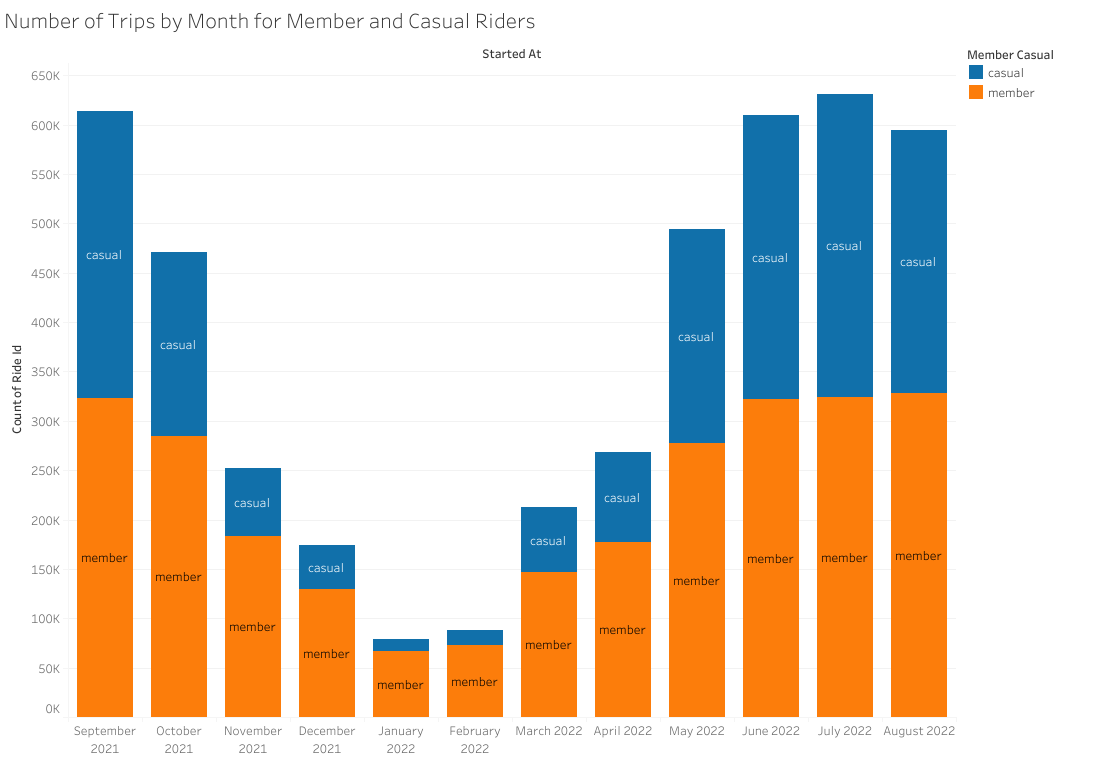

#### Average trip length

On this other graph you can see the difference in trip length by member and casual riders. So although members did **42.23%** more trips, the trips from casual riders are more than twice longer, an average of **204.78%**.

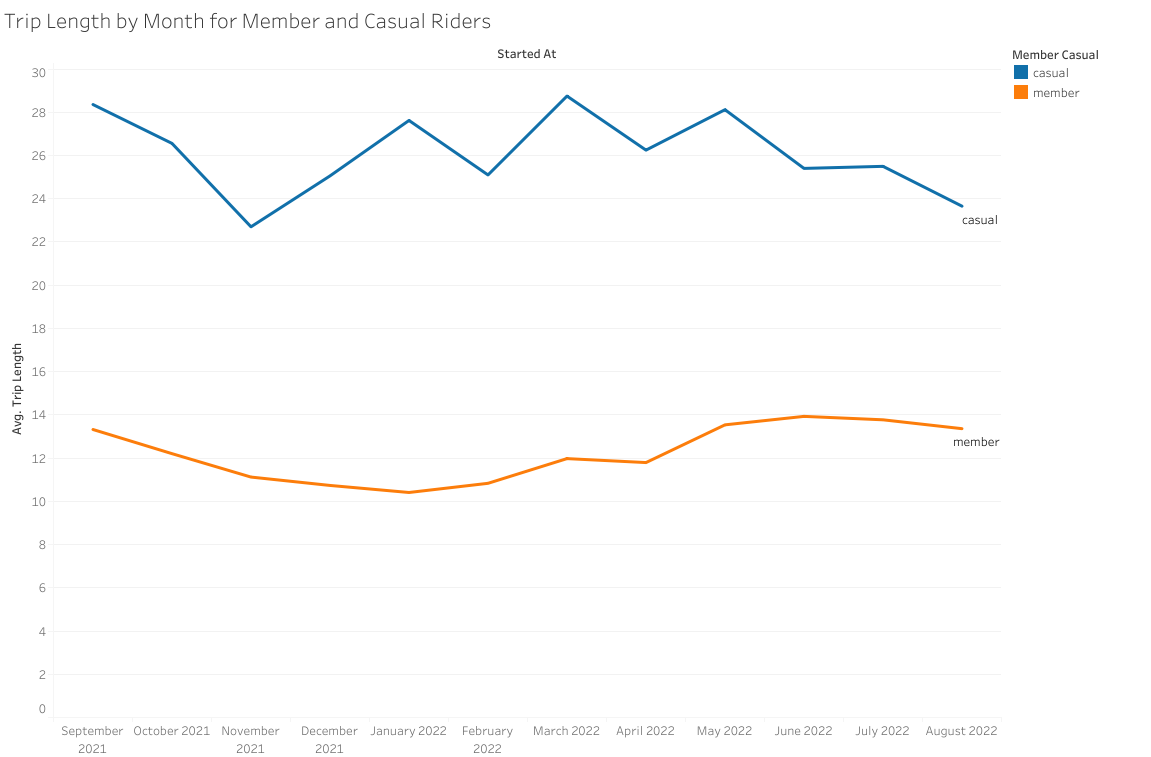

#### Trips by day of the week

On the graphs below you can compare the number of trips and average length by each day of the week. You will be able to spot that busiest days for members are Wednesday and Tuesday, while for casual riders are the weekend days, Saturday and Sunday. And longer trips happen on the weekend days, Sunday and Saturday, for both members and casual riders.

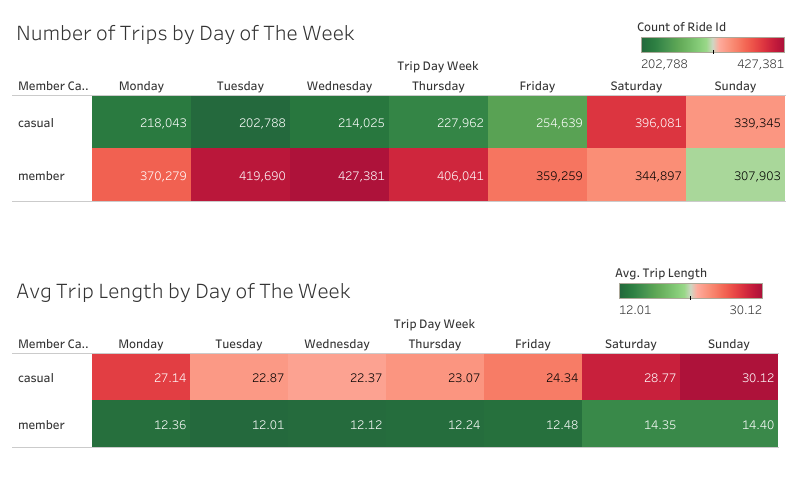

And here you can find the trips by hour, each day of the week, where we can spot that the preferred hours of the day to ride are **16, 17 and 18**, for both member and casual riders.

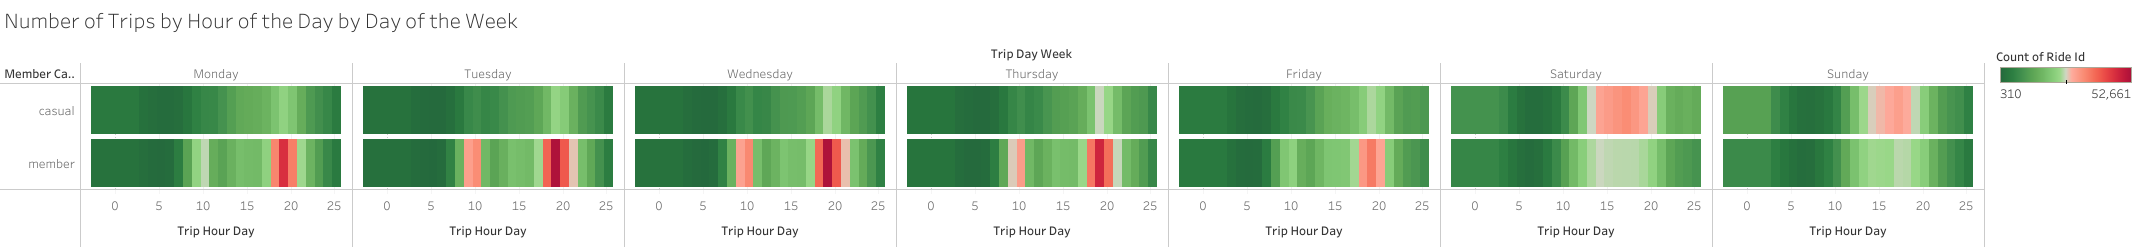

#### Busiest stations

We previouslly discovered that the preferred days for casual riders are Saturday and Sunday, on this graph you can see their preferred stations.

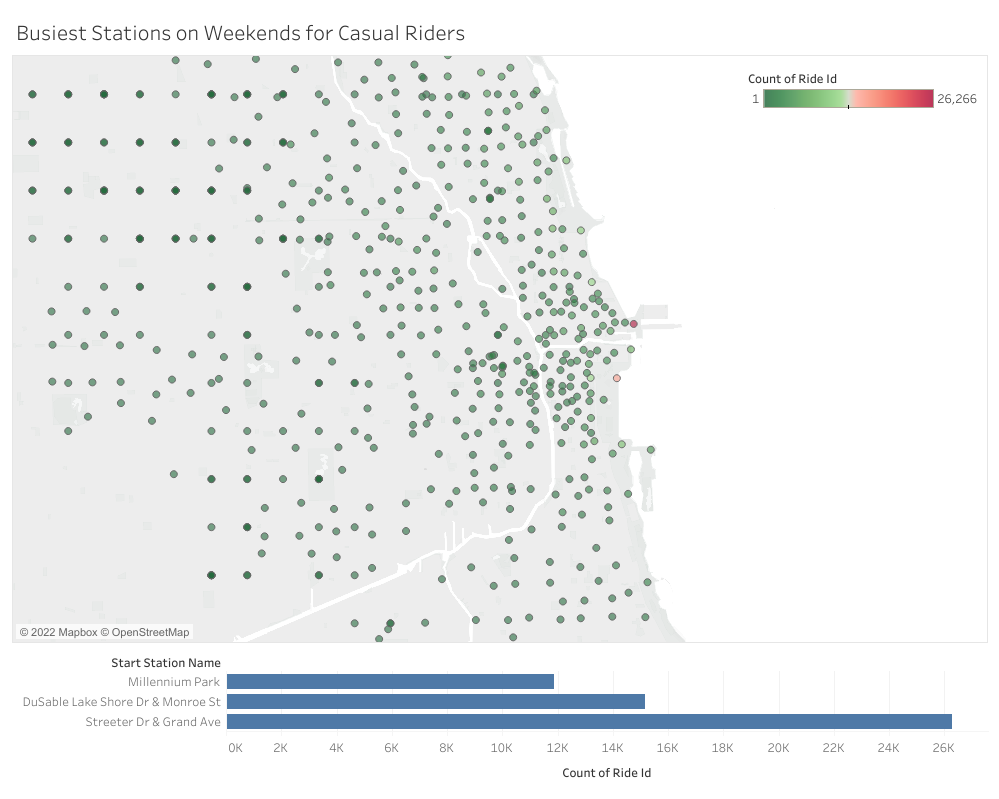

#### Trips by seasons

On this graph, you can now see the number of trips each season of the year. It's easy to see that the busiest seasons are **Summer and Spring**, followed by Fall and Winter, the latter having only **18.24%** of the trips from the highest one. Both members and casual riders have similar behavior.

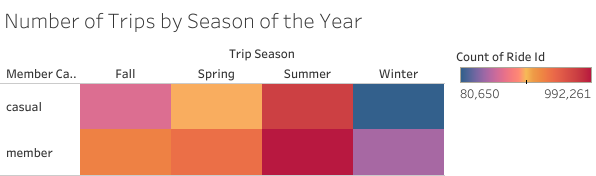

### Act

Based on the analysis shared above, my recommendations are the following:

#### In app campaign during the weekends

Casual riders prefer to ride on the weekends, the days they will access the app the most, the recommendation is to show a nudge in the app to get the annual membership. Preferably show the nudge on the busiest hours of the day, 16, 17, and 18 hours.

#### Local campaign on busiest stations

Run a local campaign with flyers/booths on the 3 busiest stations, over the weekend days. Casual riders prefer these 3 stations over the weekend: Streeter Dr & Grand Ave, DuSable Lake Shore Dr & Monroe St, and Millennium Park. The recommendation is to be on those stations with marketing material to engage with casual riders, show them all the benefits from the annual membership and motivate them to sign up.

#### Seasonal campaign

Create a campaign that focus on getting ready for summer, which is the season that casual riders like the most. Focus on health benefits of biking and the discounts they can get with an annual membership.
